In [1]:
!gdown 1pajABxMtZHAKvFczZEiZXSe8ZAQCMJto

Downloading...
From: https://drive.google.com/uc?id=1pajABxMtZHAKvFczZEiZXSe8ZAQCMJto
To: /content/ML_datasets-20230809T102746Z-001.zip
100% 5.64M/5.64M [00:00<00:00, 182MB/s]


In [2]:
!unzip /content/ML_datasets-20230809T102746Z-001.zip

Archive:  /content/ML_datasets-20230809T102746Z-001.zip
  inflating: ML_datasets/bank-full.csv  
  inflating: ML_datasets/historical_data.csv  


# Exploratory Data Analysis

## Reading CSV File

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/ML_datasets/bank-full.csv",delimiter = ";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
main_df = df

Separate the Categorical columns and Numerical Columns

In [5]:
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
num_cols = list(num_cols)
print("Numerical Features : ", num_cols)
print("Categorical Features : ",cat_cols)

Numerical Features :  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Features :  ['month', 'contact', 'housing', 'job', 'education', 'y', 'default', 'marital', 'poutcome', 'loan']


In [6]:
main_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Missing Value Detection and Elimination

Counting the Null Values

In [7]:
import numpy as np
df = df.replace('unknown', np.nan)
nulls = df

In [8]:
d2 = pd.DataFrame(df.isnull().sum(), columns=["Nulls"])
d2["Percentage"] = 100*d2["Nulls"]/len(df)
print(d2)

           Nulls  Percentage
age            0    0.000000
job          288    0.637013
marital        0    0.000000
education   1857    4.107407
default        0    0.000000
balance        0    0.000000
housing        0    0.000000
loan           0    0.000000
contact    13020   28.798301
day            0    0.000000
month          0    0.000000
duration       0    0.000000
campaign       0    0.000000
pdays          0    0.000000
previous       0    0.000000
poutcome   36959   81.747805
y              0    0.000000


Drop the poutcome since very high missing values, while using mode imputation for the other categorical variables

In [9]:
df.drop(columns='poutcome', inplace=True)

df['contact']=df['contact'].fillna(df['contact'].mode()[0])
df['education']=df['education'].fillna(df['education'].mode()[0])
df['job']=df['job'].fillna(df['job'].mode()[0])

## Outliers detection and Elimination

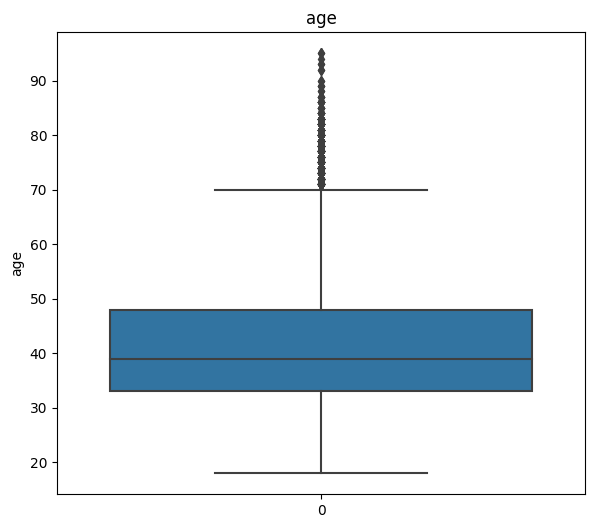

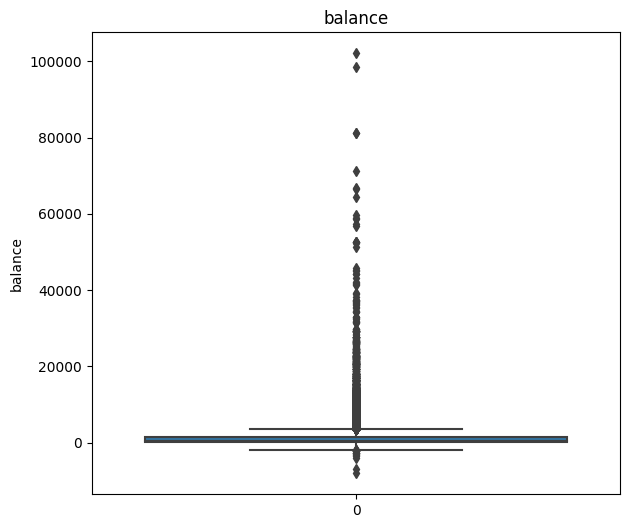

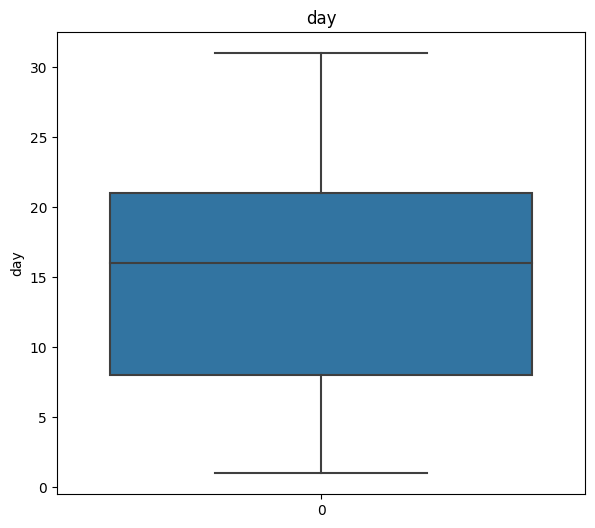

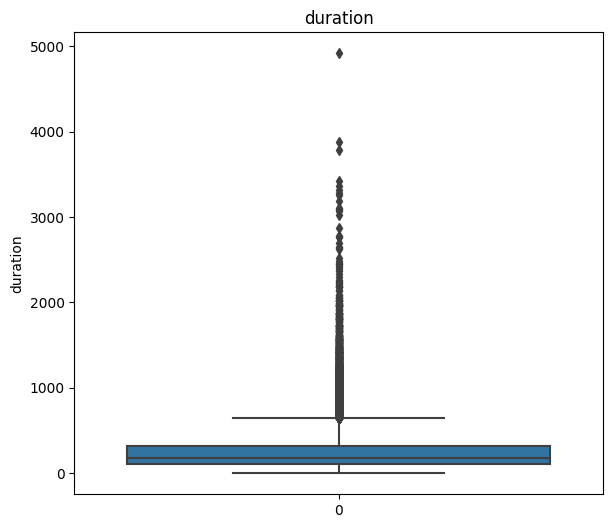

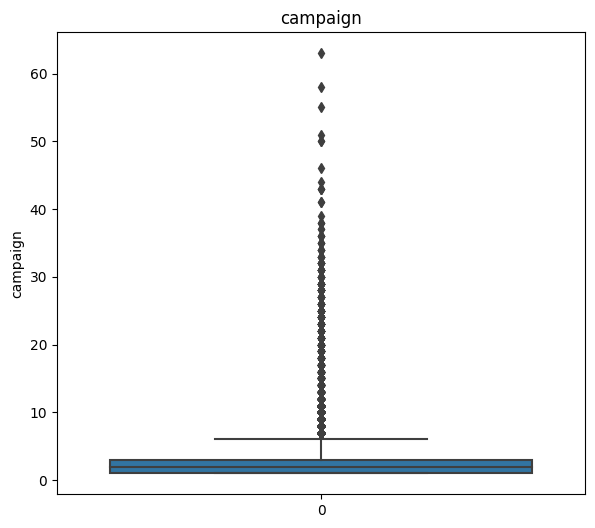

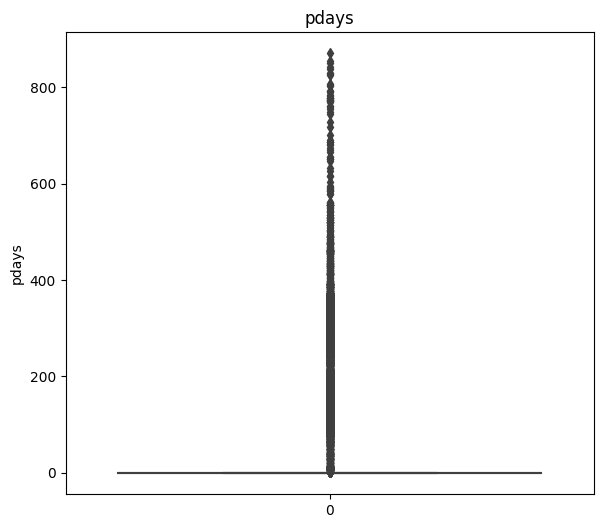

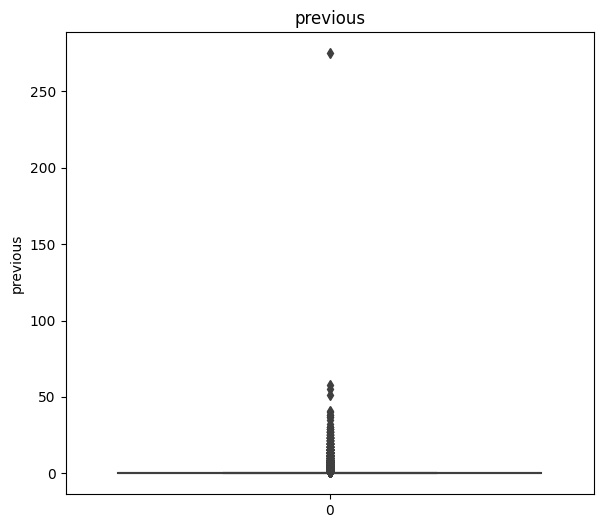

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

for var in num_cols:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

Capping the values using IQR

In [11]:
outlier_var=['age', 'balance', 'duration', 'campaign']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

__________________________________________________________________________________________


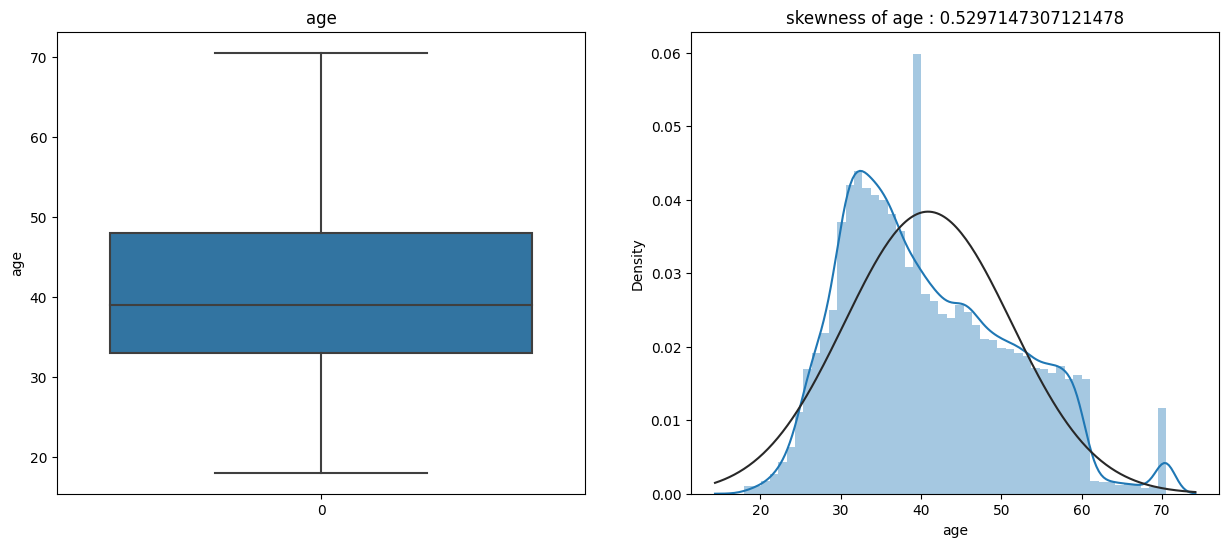

__________________________________________________________________________________________


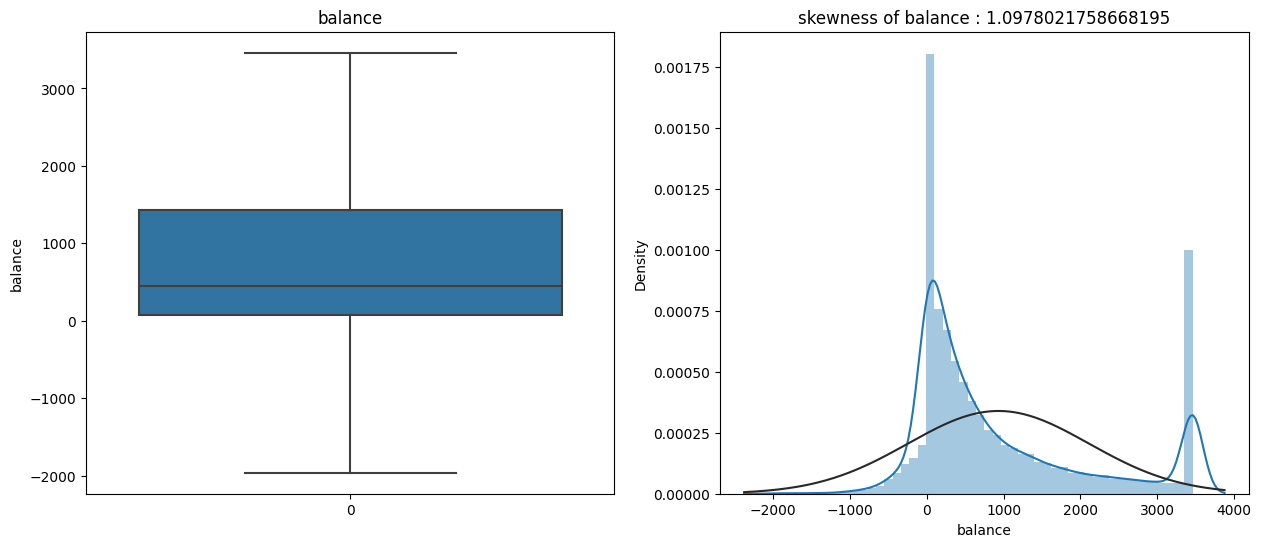

__________________________________________________________________________________________


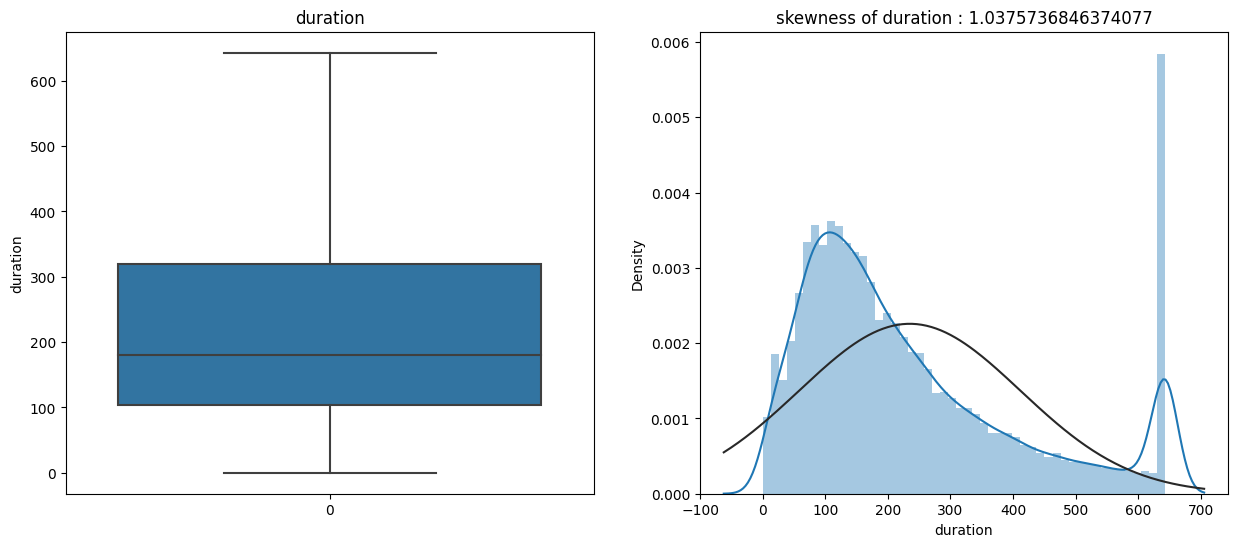

__________________________________________________________________________________________


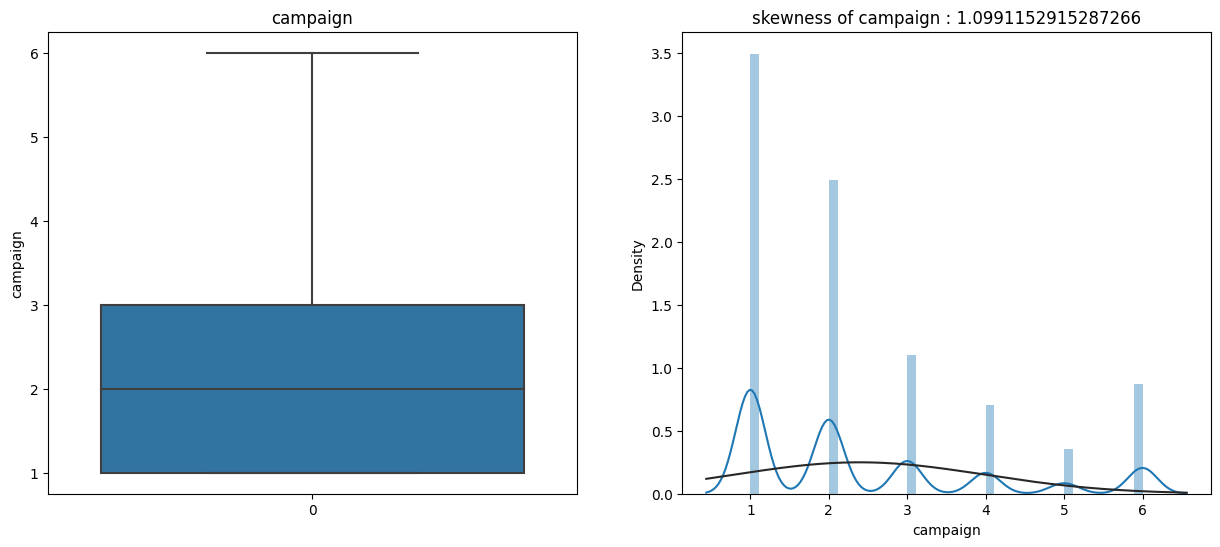

In [12]:
from scipy.stats import norm

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

## Multicollinearity

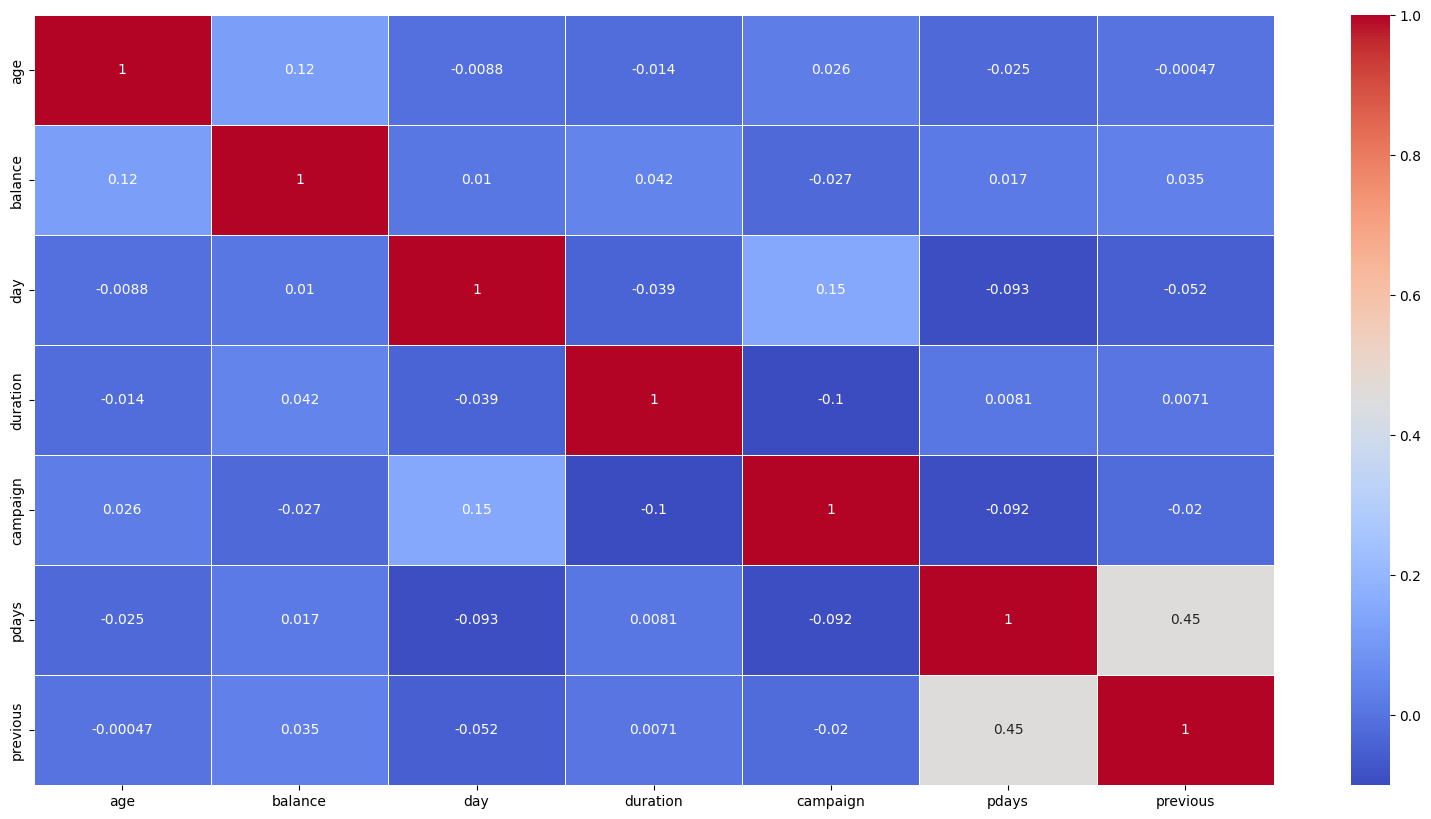

In [13]:
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df.corr(),ax = ax, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Data PreProcessing

## One Hot Encoding

In [14]:
categorical_variables=df.describe(include=['object']).columns
print(f'Categorical variables are : {list(categorical_variables)}')

Categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']


In [15]:
df['default'] = df['default'].map({'yes':1,'no':0})
df['housing'] = df['housing'].map({'yes':1,'no':0})
df['loan'] = df['loan'].map({'yes':1,'no':0})
df['contact'] = df['contact'].map({'cellular':1,'telephone':0})
df['y'] = df['y'].map({'yes':1,'no':0})

In [16]:
df=pd.get_dummies(df, columns=['marital','education','job', "month"], prefix=['marital','education',"job", "month"], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   default              45211 non-null  int64  
 2   balance              45211 non-null  int64  
 3   housing              45211 non-null  int64  
 4   loan                 45211 non-null  int64  
 5   contact              45211 non-null  int64  
 6   day                  45211 non-null  int64  
 7   duration             45211 non-null  int64  
 8   campaign             45211 non-null  int64  
 9   pdays                45211 non-null  int64  
 10  previous             45211 non-null  int64  
 11  y                    45211 non-null  int64  
 12  marital_married      45211 non-null  uint8  
 13  marital_single       45211 non-null  uint8  
 14  education_secondary  45211 non-null  uint8  
 15  education_tertiary   45211 non-null 

In [17]:
pd.set_option('display.max_columns', None)
df.head()

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y,marital_married,marital_single,education_secondary,education_tertiary,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58.0,0,2143,1,0,1,5,261,1,-1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44.0,0,29,1,0,1,5,151,1,-1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33.0,0,2,1,1,1,5,76,1,-1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47.0,0,1506,1,0,1,5,92,1,-1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33.0,0,1,0,0,1,5,198,1,-1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


<Axes: xlabel='y', ylabel='count'>

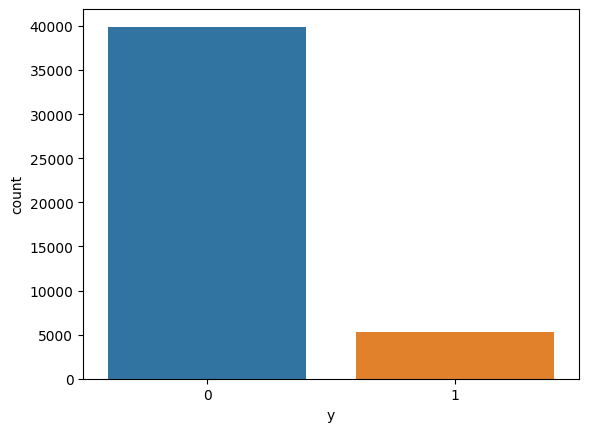

In [18]:
sns.countplot(x=df["y"])

In [19]:
len(df[df["y"] == 0])/len(df[df["y"]==1])

7.548118737001324

## Creation of X and Y

In [20]:
dependent_variable = 'y'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Create the data of independent variables
X = df[independent_variables].copy()
# Create the data of dependent variable
y = df[dependent_variable].copy()

In [21]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (36168, 36)
Shape of X_test : (9043, 36)
Shape of y_train : (36168,)
Shape of y_test : (9043,)


## Feature Selection

## ANOVA for regression features vs categorical output

<Axes: >

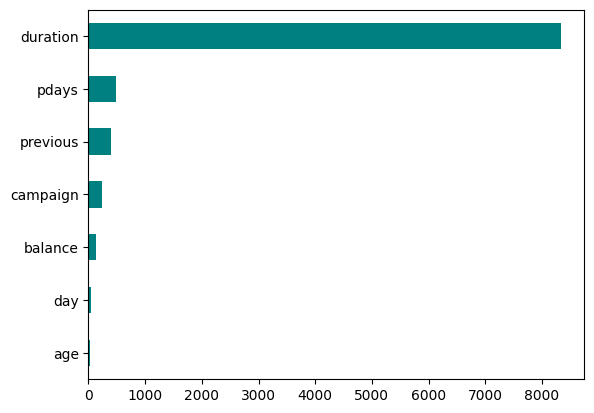

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

numericals = main_df[num_cols]
y = main_df["y"]

scores = f_classif(numericals, y)

feat_importance = pd.Series(scores[0], numericals.columns[:])
feat_importance = feat_importance.sort_values(ascending=True)
feat_importance.plot(kind='barh', color='teal')

In [24]:
num_cols, scores[0], scores[1]

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'],
 array([  28.62523309,  126.57227551,   36.35900965, 8333.76114833,
         243.35840443,  490.69656268,  396.44398944]),
 array([8.82564369e-008, 2.52111369e-029, 1.65388016e-009, 0.00000000e+000,
        1.01234736e-054, 3.79055332e-108, 7.80183035e-088]))

We can ignore age and day

## Chi Square Test

In [25]:
from sklearn.feature_selection import chi2

df2 = main_df[main_df.columns.difference(num_cols + ["y"])]
# df2 = X_train[X_train.columns.difference(num_cols + ["y"])]
for column in df2.columns.tolist():
    df2[column] = pd.factorize(df2[column])[0]

scores = chi2(df2, main_df["y"])
p_value=pd.Series(scores[1],index=df2.columns)
p_value.sort_values(ascending=True,inplace=True)

In [26]:
df2.columns, scores[0], scores[1]

(Index(['contact', 'default', 'education', 'housing', 'job', 'loan', 'marital',
        'month', 'poutcome'],
       dtype='object'),
 array([ 300.16114197,   22.31387496,  139.19123106,  486.74400336,
          61.73393822,  176.51613693,   81.31499116, 4317.61836343,
        5113.20466715]),
 array([3.03853326e-067, 2.31527677e-006, 4.00015072e-032, 7.28257003e-108,
        3.93145402e-015, 2.79337524e-040, 1.92461078e-019, 0.00000000e+000,
        0.00000000e+000]))

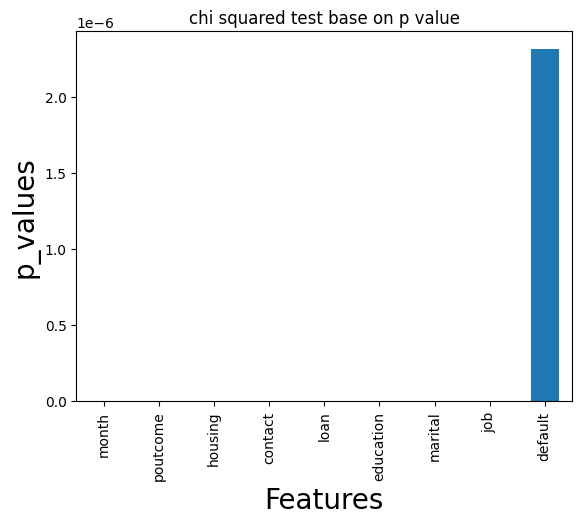

In [27]:
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
# plt.axhline(y=0.05, color="r")
plt.show()

None below 0.05, so keep all

In [28]:
drop_cols = [j for j in X.columns.tolist() if "job" in j.split("_") or "default" in j]

In [29]:
drop_cols

['job_technician',
 'job_management',
 'default',
 'job_blue-collar',
 'job_housemaid',
 'job_retired',
 'job_unemployed',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_entrepreneur']

In [30]:
X_train_2 = X_train.drop(["age", "day"], axis=1)
X_test_2 = X_test.drop(["age","day"], axis=1)

## Scaling

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
scaler2 = MinMaxScaler()

X_train_2 = scaler2.fit_transform(X_train_2)
X_test_2 = scaler2.transform(X_test_2)

# Models

In [33]:
# Import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Defining function
def classification_model(X_train, X_test, y_train, y_test, clf):
    """
    function fit the algorithm on the training set, evaluate the model, and visualise evaluation metrics
    """
    ## Fit the model using training dataset
    model=clf.fit(X_train, y_train)
    print(model)
    print('=='*45)

    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Evaluate the model
    print('Training set evaluation result :\n')
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    print("Confusion Matrix: \n", cm_train)
    print("Accuracy: ", accuracy_train)
    print("Precision: ", precision_train)
    print("Recall: ", recall_train)
    print("F1 Score: ", f1_train)
    print("roc_auc_score: ", roc_auc_score_train)
    print('\n-------------------------------\n')
    print('Test set evaluation result :\n')
    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    print("Confusion Matrix: \n", cm_test)
    print("Accuracy: ", accuracy_test)
    print("Precision: ", precision_test)
    print("Recall: ", recall_test)
    print("F1 Score: ", f1_test)
    print("roc_auc_score: ", roc_auc_score_test)
    print('=='*45)

    ## Visualizes evaluation metrics
    # fig,axes = plt.subplots(nrows=2, ncols=2)
    # ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0,0], fmt='d')
    # ax1.set_title('Confusion Matrix for training set')
    # ax1.set_ylabel('True label')
    # ax1.set_xlabel('Predicted label')
    # ax2 = sns.heatmap(cm_test, annot=True, ax=axes[0,1], fmt='d')
    # ax2.set_title('Confusion Matrix for test set')
    # ax2.set_ylabel('True label')
    # ax2.set_xlabel('Predicted label')
    # ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train], ax=axes[1,0])
    # ax3.set_title('Evaluation Metrics for training set')
    # ax3.tick_params(axis='x', rotation=90)
    # ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test], ax=axes[1,1])
    # ax4.set_title('Evaluation Metrics for test set')
    # ax4.tick_params(axis='x', rotation=90)
    # plt.tight_layout()
    # plt.show()
    # print('=='*45)

    return {'model': model, 'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred, 'cm_test': cm_test, 'accuracy_test': accuracy_test,
            'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test, 'roc_auc_score_test': roc_auc_score_test}

In [34]:
# Defining function which fit classification algoritham using GridSearchCV, evaluate and visualise model

# Import necessary dependancy
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV

# Defining function
def classification_CV_model(X_train, X_test, y_train, y_test, clf, param_grid):
    """
    function fit the algorithm using GridSearchCV on the training set, evaluate the model, and visualise evaluation metrics
    """
    ## Fit the model on training dataset
    classifier = clf
    model = GridSearchCV(classifier, param_grid, verbose=1, scoring='accuracy', cv=3, n_jobs=-1)
    model.fit(X_train, y_train)
    print(model)
    print('=='*45)

    # Print the best parameters and score
    print("Best parameters:", model.best_params_)
    print("Best score:", model.best_score_)
    print('=='*45)

    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Evaluate the model
    print('Training set evaluation result :\n')
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    print("Confusion Matrix: \n", cm_train)
    print("Accuracy: ", accuracy_train)
    print("Precision: ", precision_train)
    print("Recall: ", recall_train)
    print("F1 Score: ", f1_train)
    print("roc_auc_score: ", roc_auc_score_train)
    print('\n-------------------------------\n')
    print('Test set evaluation result :\n')
    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    print("Confusion Matrix: \n", cm_test)
    print("Accuracy: ", accuracy_test)
    print("Precision: ", precision_test)
    print("Recall: ", recall_test)
    print("F1 Score: ", f1_test)
    print("roc_auc_score: ", roc_auc_score_test)
    print('=='*45)

    # ## Visualizes evaluation metrics
    # fig,axes = plt.subplots(nrows=2, ncols=2)
    # ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0,0], fmt='d')
    # ax1.set_title('Confusion Matrix for training set')
    # ax1.set_ylabel('True label')
    # ax1.set_xlabel('Predicted label')
    # ax2 = sns.heatmap(cm_test, annot=True, ax=axes[0,1], fmt='d')
    # ax2.set_title('Confusion Matrix for test set')
    # ax2.set_ylabel('True label')
    # ax2.set_xlabel('Predicted label')
    # ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train], ax=axes[1,0])
    # ax3.set_title('Evaluation Metrics for training set')
    # ax3.tick_params(axis='x', rotation=90)
    # ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test], ax=axes[1,1])
    # ax4.set_title('Evaluation Metrics for test set')
    # ax4.tick_params(axis='x', rotation=90)
    # plt.tight_layout()
    # plt.show()
    # print('=='*45)

    return {'model': model, 'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred, 'cm_test': cm_test, 'accuracy_test': accuracy_test,
            'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test, 'roc_auc_score_test': roc_auc_score_test}

In [35]:
# Defining function to plot ROC curve
def plot_roc_curve(y_test, y_pred):
    """
    plots the roc curve
    """
    # Generate a list of false and true positive rates
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # Calculate the area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    # Plotting the ROC curve
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    # Labeling the graph
    plt.xlabel('False Positive Rate (Precision)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    # Show the plot
    plt.show()

## Baseline Model (Logistic Regression)

### Vanilla Logistic Regression

In [ ]:
# Import Logistic Regression algoritham in envirnoment
from sklearn.linear_model import LogisticRegression
# Fitting Logistic Regression model to training set
Logistic_regression=LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
lr=classification_model(X_train, X_test, y_train, y_test, Logistic_regression)

LogisticRegression(max_iter=10000, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[31079   891]
 [ 3032  1166]]
Accuracy:  0.8915339526653395
Precision:  0.5668449197860963
Recall:  0.2777513101476894
F1 Score:  0.37282174260591533
roc_auc_score:  0.6249407160685272

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7726  226]
 [ 790  301]]
Accuracy:  0.8876479044564857
Precision:  0.571157495256167
Recall:  0.2758936755270394
F1 Score:  0.37206427688504323
roc_auc_score:  0.6237365761941032


In [ ]:
Logistic_regression=LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
lr=classification_model(X_train_2, X_test_2, y_train, y_test, Logistic_regression)

LogisticRegression(max_iter=10000, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[31080   890]
 [ 3035  1163]]
Accuracy:  0.8914786551647865
Precision:  0.5664880662445202
Recall:  0.2770366841353025
F1 Score:  0.3721004639257719
roc_auc_score:  0.624599042724517

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7724  228]
 [ 787  304]]
Accuracy:  0.8877584872276899
Precision:  0.5714285714285714
Recall:  0.27864344637946836
F1 Score:  0.37461491065927294
roc_auc_score:  0.6249857070931547


Feature dropping does better

### Grid Search

In [ ]:
## Import Logistic Regression algoritham in envirnoment
from sklearn.linear_model import LogisticRegression

## Fitting Logistic Regression model to training set using cross validation

# Defined param_dict
param_grid ={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# Creating instance of Logistic Regression classifier
Logistic_regression=LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
# Fitting model
lr_cv=classification_CV_model(X_train, X_test, y_train, y_test, Logistic_regression, param_grid)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, random_state=0),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy', verbose=1)
Best parameters: {'C': 10}
Best score: 0.8911745189117452
Training set evaluation result :

Confusion Matrix: 
 [[31067   903]
 [ 3024  1174]]
Accuracy:  0.8914233576642335
Precision:  0.5652383245064998
Recall:  0.2796569795140543
F1 Score:  0.37418326693227094
roc_auc_score:  0.6257058748055101

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7721  231]
 [ 782  309]]
Accuracy:  0.8879796527700984
Precision:  0.5722222222222222
Recall:  0.2832263978001833
F1 Score:  0.37890864500306565
roc_auc_score:  0.6270885510127678


In [ ]:
Logistic_regression=LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
# Fitting model
lr_cv=classification_CV_model(X_train_2, X_test_2, y_train, y_test, Logistic_regression, param_grid)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, random_state=0),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy', verbose=1)
Best parameters: {'C': 1}
Best score: 0.8910362751603627
Training set evaluation result :

Confusion Matrix: 
 [[31080   890]
 [ 3035  1163]]
Accuracy:  0.8914786551647865
Precision:  0.5664880662445202
Recall:  0.2770366841353025
F1 Score:  0.3721004639257719
roc_auc_score:  0.624599042724517

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7724  228]
 [ 787  304]]
Accuracy:  0.8877584872276899
Precision:  0.5714285714285714
Recall:  0.27864344637946836
F1 Score:  0.37461491065927294
roc_auc_score:  0.6249857070931547


### With Weighted Loss

In [ ]:
# Import Logistic Regression algoritham in envirnoment
from sklearn.linear_model import LogisticRegression
# Fitting Logistic Regression model to training set

class_weights = {
    0: 1, # majority class
    1: 7.6 # minority class
}

Logistic_regression=LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0, class_weight=class_weights)
lr=classification_model(X_train, X_test, y_train, y_test, Logistic_regression)

LogisticRegression(class_weight={0: 1, 1: 7.6}, max_iter=10000, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[25950  6020]
 [  748  3450]]
Accuracy:  0.8128732581287326
Precision:  0.36430834213305174
Recall:  0.8218199142448785
F1 Score:  0.504828797190518
roc_auc_score:  0.8167591907789922

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[6430 1522]
 [ 201  890]]
Accuracy:  0.8094658852150834
Precision:  0.36898839137645106
Recall:  0.8157653528872594
F1 Score:  0.5081358835284042
roc_auc_score:  0.8121834812726035


In [ ]:
Logistic_regression=LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0, class_weight=class_weights)
lr=classification_model(X_train_2, X_test_2, y_train, y_test, Logistic_regression)

LogisticRegression(class_weight={0: 1, 1: 7.6}, max_iter=10000, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[25952  6018]
 [  751  3447]]
Accuracy:  0.8128456093784561
Precision:  0.3641838351822504
Recall:  0.8211052882324916
F1 Score:  0.504574398009222
roc_auc_score:  0.8164331570971654

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[6428 1524]
 [ 203  888]]
Accuracy:  0.8090235541302665
Precision:  0.3681592039800995
Recall:  0.8139321723189734
F1 Score:  0.5069940051384527
roc_auc_score:  0.8111411364612976


## Using SMOTE

In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train,y_train)
x_smote.shape, y_smote.shape, X_test.shape, y_test.shape

x_smote_2, y_smote_2 = smote.fit_resample(X_train_2,y_train)

In [ ]:
param_grid ={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# Creating instance of Logistic Regression classifier
Logistic_regression=LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
# Fitting model
lr_cv=classification_CV_model(x_smote, X_test, y_smote, y_test, Logistic_regression, param_grid)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, random_state=0),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy', verbose=1)
Best parameters: {'C': 100}
Best score: 0.8333750952745419
Training set evaluation result :

Confusion Matrix: 
 [[26130  5840]
 [ 4792 27178]]
Accuracy:  0.833719111667188
Precision:  0.8231267793324853
Recall:  0.8501094776352831
F1 Score:  0.8364005662583861
roc_auc_score:  0.8337191116671879

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[6456 1496]
 [ 210  881]]
Accuracy:  0.8113457923255557
Precision:  0.37063525452250734
Recall:  0.8075160403299725
F1 Score:  0.508073817762399
roc_auc_score:  0.8096936338470787


In [ ]:
param_grid ={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# Creating instance of Logistic Regression classifier
Logistic_regression=LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
# Fitting model
lr_cv=classification_CV_model(x_smote_2, X_test_2, y_smote_2, y_test, Logistic_regression, param_grid)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, random_state=0),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy', verbose=1)
Best parameters: {'C': 1000}
Best score: 0.8318736825677115
Training set evaluation result :

Confusion Matrix: 
 [[26126  5844]
 [ 4862 27108]]
Accuracy:  0.832561776665624
Precision:  0.8226511289147851
Recall:  0.8479199249296215
F1 Score:  0.8350944209975047
roc_auc_score:  0.8325617766656239

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[6461 1491]
 [ 209  882]]
Accuracy:  0.8120092889527811
Precision:  0.37168141592920356
Recall:  0.8084326306141155
F1 Score:  0.5092378752886836
roc_auc_score:  0.8104663153070577


Best results obtained with Grid Search & Cross Validation Logistic Regression

## SVM

Accuracy:  0.8879796527700984
Precision:  0.6989795918367347
Recall:  0.12557286892758937
F1 Score:  0.2128982128982129
roc_auc_score:  0.5590766759124869

In [ ]:
# Import Support Vector Machine algoritham in envirnoment
from sklearn.svm import SVC
# Fitting Support Vector Machine algoritham to training set

classifier_svm = SVC(kernel='rbf', C=100, gamma=1)
svm=classification_model(X_train, X_test, y_train, y_test, classifier_svm)

SVC(C=100, gamma=1)
Training set evaluation result :

Confusion Matrix: 
 [[31882    88]
 [  369  3829]]
Accuracy:  0.9873645211236453
Precision:  0.9775338269083482
Recall:  0.9121010004764173
F1 Score:  0.9436845348120764
roc_auc_score:  0.9546742099660787

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7423  529]
 [ 616  475]]
Accuracy:  0.873382726971138
Precision:  0.47310756972111556
Recall:  0.43538038496791936
F1 Score:  0.45346062052505964
roc_auc_score:  0.684428120049352


In [ ]:
from sklearn.svm import SVC
# Fitting Support Vector Machine algoritham to training set
classifier_svm = SVC(kernel='rbf', C=100, gamma=1)
svm=classification_model(X_train_2, X_test_2, y_train, y_test, classifier_svm)

SVC(C=100, gamma=1)
Training set evaluation result :

Confusion Matrix: 
 [[31740   230]
 [ 1010  3188]]
Accuracy:  0.9657155496571554
Precision:  0.9327091866588648
Recall:  0.7594092424964268
F1 Score:  0.8371848739495799
roc_auc_score:  0.8761074989460551

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7507  445]
 [ 676  415]]
Accuracy:  0.8760367134800399
Precision:  0.48255813953488375
Recall:  0.38038496791934007
F1 Score:  0.4254228600717581
roc_auc_score:  0.6622121016659075


## Random Forest

In [37]:
# Import Random Forest algoritham in envirnoment
from sklearn.ensemble import RandomForestClassifier

## Fitting Random Forest model to training set using cross validation

# Defining param_dict
param_grid = {'n_estimators':[25, 50, 75, 100],
              'max_depth':[2,4,6,8],
              'min_samples_split':[25,50,100,150],
              'min_samples_leaf':[10,20,40,70,100]}
# Creating instance of Random Forest classifier
classifier_rf = RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
# Fitting model
rf_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_rf, param_grid)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              max_leaf_nodes=10,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [10, 20, 40, 70, 100],
                         'min_samples_split': [25, 50, 100, 150],
                         'n_estimators': [25, 50, 75, 100]},
             scoring='accuracy', verbose=1)
Best parameters: {'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 150, 'n_estimators': 25}
Best score: 0.883958195089582
Training set evaluation result :

Confusion Matrix: 
 [[31969     1]
 [ 4198     0]]
Accuracy:  0.883902897589029
Precision:  0.0
Recall:  0.0
F1 Score:  0.0
roc_auc_score:  0.4999843603378167

-------------------------------

Test set evaluation result :

Confusion Matrix:

## Gradient Boosting

In [38]:
# Import Gradient Boosting Machine algoritham in envirnoment
from sklearn.ensemble import GradientBoostingClassifier

## Fitting Gradient Boosting Machine model to training set using cross validation

# Defining param_dict
param_grid = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
# Creating instance of Gradient Boosting Machine classifier
classifier_gbm = GradientBoostingClassifier( random_state=0)
# Fitting model
gbm_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_gbm, param_grid)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=1)
Best parameters: {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 100, 'n_estimators': 100}
Best score: 0.8996073877460738
Training set evaluation result :

Confusion Matrix: 
 [[31296   674]
 [ 1726  2472]]
Accuracy:  0.93364299933643
Precision:  0.7857596948506039
Recall:  0.5888518342067651
F1 Score:  0.6732026143790849
roc_auc_score:  0.7838847847918404

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7671  281]
 [ 607  484]]
Accuracy:  0.9018024991706293
Precision:  0.6326797385620915
Recall:  0.44362969752520626
F1 Score:  0.521551724137

## XG Boost (Best)

In [39]:
# Import XGBoost algoritham in envirnoment
from xgboost import XGBClassifier

## Fitting XGBoost model to training set using cross validation

# Defining param_dict
param_grid = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
# Creating instance of XGBoost classifier
classifier_xgb = XGBClassifier(random_state=0)
# Fitting model
xgb_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_xgb, param_grid)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[15:04:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=No

In [40]:
from xgboost import XGBClassifier

## Fitting XGBoost model to training set using cross validation

# Defining param_dict
param_grid = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
# Creating instance of XGBoost classifier
classifier_xgb = XGBClassifier(random_state=0)
# Fitting model
xgb_cv=classification_CV_model(X_train_2, X_test_2, y_train, y_test, classifier_xgb, param_grid)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[15:49:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=No

In [44]:
from xgboost import XGBClassifier

## Fitting XGBoost model to training set using cross validation

# Defining param_dict
param_grid = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
# Creating instance of XGBoost classifier
classifier_xgb = XGBClassifier(random_state=0)
# Fitting model
xgb_cv=classification_CV_model(x_smote, X_test, y_smote, y_test, classifier_xgb, param_grid)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[16:37:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=No

In [45]:
from xgboost import XGBClassifier

## Fitting XGBoost model to training set using cross validation

# Defining param_dict
param_grid = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
# Creating instance of XGBoost classifier
classifier_xgb = XGBClassifier(random_state=0)
# Fitting model
xgb_cv=classification_CV_model(x_smote_2, X_test_2, y_smote_2, y_test, classifier_xgb, param_grid)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[16:55:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=No